# 5. Mask/Select/Map/Filter/Metaprogramming...
- Learn how to extract data from the data table with JuliaDB and Mera functions
- Filter the data table according to one or several conditions
- Extract data from a filtered data table and use it for further calculations
- Extend the data table with new columns/variables
- Mask data with different methods and apply it to some functions

## Load The Data

In [2]:
using Mera
info = getinfo(400, "../../testing/simulations/manu_sim_sf_L14");
gas       = gethydro(info, lmax=8, smallr=1e-5);  
particles = getparticles(info)
clumps    = getclumps(info);

[Mera]: 2020-01-30T16:53:24.625

Code: RAMSES
output [400] summary:
mtime: 2018-09-05T09:51:55.041
ctime: 2019-11-01T17:35:21.051
simulation time: 594.98 [Myr]
boxlen: 48.0 [kpc]
ncpu: 2048
ndim: 3
-------------------------------------------------------
amr:           true
level(s): 6 - 14 --> cellsize(s): 750.0 [pc] - 2.93 [pc]
-------------------------------------------------------
hydro:         true
hydro-variables:  7  --> (:rho, :vx, :vy, :vz, :p, :var6, :var7)
hydro-descriptor: (:density, :velocity_x, :velocity_y, :velocity_z, :thermal_pressure, :passive_scalar_1, :passive_scalar_2)
γ: 1.6667
-------------------------------------------------------
gravity:       true
gravity-variables: (:epot, :ax, :ay, :az)
-------------------------------------------------------
particles:     true
- Npart:    5.091500e+05 
- Nstars:   5.066030e+05 
- Ndm:      2.547000e+03 
particle variables: (:vx, :vy, :vz, :mass, :birth)
-------------------------------------------------------
clumps:       

100%|███████████████████████████████████████████████████| Time: 0:02:18


Memory used for data table :71.28007793426514 MB
-------------------------------------------------------

[Mera]: Get particle data: 2020-01-30T16:55:58.177

Key vars=(:level, :x, :y, :z, :id)
Using var(s)=(1, 2, 3, 4, 5) = (:vx, :vy, :vz, :mass, :birth) 

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]



Reading data...100%|████████████████████████████████████| Time: 0:00:03


Found 5.089390e+05 particles
Memory used for data table :34.947275161743164 MB
-------------------------------------------------------

[Mera]: Get clump data: 2020-01-30T16:56:04.184

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]

Read 12 colums: 
Symbol[:index, :lev, :parent, :ncell, :peak_x, :peak_y, :peak_z, Symbol("rho-"), Symbol("rho+"), :rho_av, :mass_cl, :relevance]
Memory used for data table :61.77734375 KB
-------------------------------------------------------



## Select From Data Table

### Select a single column/variable

##### By using JuliaDB or Mera functions 

In [28]:
using JuliaDB

The JuliaDB data table is stored in the *data*-field of any *DataSetType*. Extract an existing column (variable):

In [3]:
select(gas.data, :rho) # JuliaDB

849332-element Array{Float64,1}:
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 ⋮                     
 0.00010967104288285959
 0.0001088040126114162 
 0.00010915603617815434
 0.00010917096551347797
 0.00012465438542871006
 0.00011934527871880502
 0.00011294656300014925
 0.00011110068692986109
 0.00010901341218606515
 0.00010849404903183988
 0.00010900588395976569
 0.00010910219163333514

Pass the entire *DataSetType* (here *gas*) to the Mera function *getvar* to extract the selected variable or derived quantity from the data table.
Call *getvar()* to get a list of the predefined quantities.

In [4]:
getvar(gas, :rho) # MERA

849332-element Array{Float64,1}:
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 ⋮                     
 0.00010967104288285959
 0.0001088040126114162 
 0.00010915603617815434
 0.00010917096551347797
 0.00012465438542871006
 0.00011934527871880502
 0.00011294656300014925
 0.00011110068692986109
 0.00010901341218606515
 0.00010849404903183988
 0.00010900588395976569
 0.00010910219163333514

### Select several columns

By selecting several columns a new JuliaDB databse is returned:

In [5]:
select(gas.data, (:rho, :level)) #JuliaDB

Table with 849332 rows, 2 columns:
rho          level
──────────────────
1.0e-5       6
1.0e-5       6
1.0e-5       6
1.0e-5       6
1.0e-5       6
1.0e-5       6
1.0e-5       6
1.0e-5       6
1.0e-5       6
1.0e-5       6
1.0e-5       6
1.0e-5       6
⋮
0.000108804  8
0.000109156  8
0.000109171  8
0.000124654  8
0.000119345  8
0.000112947  8
0.000111101  8
0.000109013  8
0.000108494  8
0.000109006  8
0.000109102  8

The getvar function returns a dictionary containing the extracted arrays:

In [6]:
getvar(gas, [:rho, :level]) # MERA

Dict{Any,Any} with 2 entries:
  :level => [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0  …  8.0, 8.0, 8.0…
  :rho   => [1.0e-5, 1.0e-5, 1.0e-5, 1.0e-5, 1.0e-5, 1.0e-5, 1.0e-5, 1.0e-5, 1.…

Select one or more columns and get a tuple of vectors:

In [7]:
vtuple = columns(gas.data, (:rho, :level)) # JuliaDB

(rho = [1.0e-5, 1.0e-5, 1.0e-5, 1.0e-5, 1.0e-5, 1.0e-5, 1.0e-5, 1.0e-5, 1.0e-5, 1.0e-5  …  0.00010915603617815434, 0.00010917096551347797, 0.00012465438542871006, 0.00011934527871880502, 0.00011294656300014925, 0.00011110068692986109, 0.00010901341218606515, 0.00010849404903183988, 0.00010900588395976569, 0.00010910219163333514], level = [6, 6, 6, 6, 6, 6, 6, 6, 6, 6  …  8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

In [8]:
propertynames(vtuple)

(:rho, :level)

In [9]:
vtuple.rho

849332-element Array{Float64,1}:
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 1.0e-5                
 ⋮                     
 0.00010967104288285959
 0.0001088040126114162 
 0.00010915603617815434
 0.00010917096551347797
 0.00012465438542871006
 0.00011934527871880502
 0.00011294656300014925
 0.00011110068692986109
 0.00010901341218606515
 0.00010849404903183988
 0.00010900588395976569
 0.00010910219163333514

## Filter by Condition
### With JuliaDB (example A)

Get all the data corresponding to cells/rows with level=6. Here, the variable *p* is used as placeholder for rows. A new JuliaDB data table is returend:

In [5]:
filtered_db = filter(p->p.level==6, gas.data ) # JuliaDB
# see the reduced row number

Table with 240956 rows, 11 columns:
Columns:
#   colname  type
────────────────────
1   level    Int64
2   cx       Int64
3   cy       Int64
4   cz       Int64
5   rho      Float64
6   vx       Float64
7   vy       Float64
8   vz       Float64
9   p        Float64
10  var6     Float64
11  var7     Float64

### With Macro Expression (example A)
(see the documentation at: <https://piever.github.io/JuliaDBMeta.jl/stable/> )

In [6]:
using JuliaDBMeta

In [13]:
filtered_db = @filter gas.data :level==6 # JuliaDBMeta

Table with 240956 rows, 12 columns:
Columns:
#   colname  type
────────────────────
1   level    Int64
2   cpu      Int64
3   cx       Int64
4   cy       Int64
5   cz       Int64
6   rho      Float64
7   vx       Float64
8   vy       Float64
9   vz       Float64
10  p        Float64
11  var6     Float64
12  var7     Float64

### With JuliaDB (example B)

Get all cells/rows with densities >= 3 Msol/pc^3. Since the data is given in code units, we need to convert from the given physical units:

In [7]:
density = 3. / gas.scale.Msol_pc3
filtered_db = filter(p->p.rho>= density, gas.data ) # JuliaDB

Table with 210 rows, 11 columns:
Columns:
#   colname  type
────────────────────
1   level    Int64
2   cx       Int64
3   cy       Int64
4   cz       Int64
5   rho      Float64
6   vx       Float64
7   vy       Float64
8   vz       Float64
9   p        Float64
10  var6     Float64
11  var7     Float64

### With Macro Expression (example B)

In [8]:
density = 3. /gas.scale.Msol_pc3
filtered_db = @filter gas.data :rho>= density # JuliaDBMeta

Table with 210 rows, 11 columns:
Columns:
#   colname  type
────────────────────
1   level    Int64
2   cx       Int64
3   cy       Int64
4   cz       Int64
5   rho      Float64
6   vx       Float64
7   vy       Float64
8   vz       Float64
9   p        Float64
10  var6     Float64
11  var7     Float64

### Get a Quantity/Variable from The Filtered Data Table

Calculate the mass for each cell and the sum:

In [9]:
mass_tot = getvar(gas, :mass, :Msol) # the full data table
sum(mass_tot)

3.0968754148332745e10

The same calculation is possible for the filtered data base which has to be passed together with the original object, here: *gas*

In [10]:
mass_filtered_tot = getvar(gas, :mass, :Msol, filtered_db=filtered_db) # the filtered data table
sum(mass_filtered_tot)

1.4862767967535206e10

### Create a New DataSetType from a Filtered Data Table

A new *DataSetType* can be constructed for the filtered data table that can be passed to the functions.

In [12]:
density = 3. /gas.scale.Msol_pc3
filtered_db = @filter gas.data :rho >= density
gas_new = construct_datatype(filtered_db, gas);

In [14]:
# Both are now of HydroDataType and include the same information about the simulation properties (besides the canged data table)
println( typeof(gas) )
println( typeof(gas_new) )

HydroDataType
HydroDataType


In [16]:
mass_filtered_tot = getvar(gas_new, :mass, :Msol)
sum(mass_filtered_tot)

1.4862767967535206e10

## Filter by Multiple Conditions

### With JuliaDB

Get the mass of all cells/rows with densities >= 3 Msol/pc^3 that is within the disk radius of 3 kpc and 2 kpc from the plane:

In [17]:
boxlen = info.boxlen
cv = boxlen/2. # box-center 
density = 3. /gas.scale.Msol_pc3
radius  = 3. /gas.scale.kpc
height  = 2. /gas.scale.kpc

# filter cells/rows that contain rho greater equal density
filtered_db = filter(p->p.rho >= density, gas.data )

# filter cells/rows lower equal the defined radius and height
# (convert the cell number to a position according to its cellsize and relative to the box center)
filtered_db = filter(row-> sqrt( (row.cx * boxlen /2^row.level - cv)^2 + (row.cy * boxlen /2^row.level - cv)^2) <= radius &&
                              abs(row.cz * boxlen /2^row.level - cv) <= height, filtered_db)

var_filtered = getvar(gas, :mass, filtered_db=filtered_db, unit=:Msol)
sum(var_filtered) # [Msol]

2.750632450062189e9

### Use Pipeline Macros

In [18]:
boxlen = info.boxlen
cv = boxlen/2.
density = 3. /gas.scale.Msol_pc3
radius  = 3. /gas.scale.kpc
height  = 2. /gas.scale.kpc

filtered_db = @apply gas.data begin
     @where :rho >= density
     @where sqrt( (:cx * boxlen/2^:level - cv)^2 + (:cy * boxlen/2^:level - cv)^2 ) <= radius
     @where abs(:cz * boxlen/2^:level -cv) <= height
end

var_filtered = getvar(gas, :mass, filtered_db=filtered_db, unit=:Msol)
sum(var_filtered) # [Msol]

2.750632450062189e9

### External Functions With JuliaDB

In [19]:
boxlen = info.boxlen
function r(x,y,level,boxlen)
    return sqrt((x * boxlen /2^level - boxlen/2.)^2 + (y * boxlen /2^level - boxlen/2.)^2)
end

function h(z,level,boxlen)
    return abs(z  * boxlen /2^level - boxlen/2.)
end


density = 3. /gas.scale.Msol_pc3
radius  = 3. /gas.scale.kpc
height  = 2. /gas.scale.kpc


filtered_db = filter(row->  row.rho >= density &&
                            r(row.cx,row.cy, row.level, boxlen) <= radius &&
                            h(row.cz,row.level, boxlen) <= height,  gas.data)


var_filtered = getvar(gas, :mass, filtered_db=filtered_db, unit=:Msol)
sum(var_filtered) # [Msol]

2.750632450062189e9

### External Functions With Macro Expression

In [20]:
boxlen = info.boxlen
cv = boxlen/2.
density = 3. /gas.scale.Msol_pc3
radius  = 3. /gas.scale.kpc
height  = 2. /gas.scale.kpc

function p(val, level, boxlen)
    cv = boxlen/2
    return val * boxlen /2^level - cv
end

filtered_db = @apply gas.data begin
     @where :rho >= density
     @where sqrt( p(:cx, :level, boxlen)^2 + p(:cy, :level, boxlen)^2  ) <= radius
     @where abs( p(:cz, :level, boxlen) ) <= height
end

var_filtered = getvar(gas, :mass, filtered_db=filtered_db, unit=:Msol)
sum(var_filtered) # [Msol]

2.750632450062189e9

### Compare With Predefined Functions

Compare the previous calculations with the predefined *subregion* function:
The *subregion* function takes the intersected cells of the range borders into account (default):

In [21]:
density = 3. /gas.scale.Msol_pc3 # in code units

sub_region = subregion(gas, :cylinder, radius=3., height=2., center=[:boxcenter], range_unit=:kpc, verbose=false ) # default: cell=true
filtered_db = @filter sub_region.data :rho >= density

var_filtered = getvar(gas, :mass, :Msol, filtered_db=filtered_db)
sum(var_filtered) # [Msol]

2.9388306102361355e9

By setting the keyword *cell=false*, only the cell-centres within the defined region are taken into account (as in the calculations in the previous section).

In [22]:
density = 3. /gas.scale.Msol_pc3 # in code units

sub_region = subregion(gas, :cylinder, radius=3., height=2., center=[:boxcenter], range_unit=:kpc, cell=false, verbose=false )
filtered_db = @filter sub_region.data :rho >= density

var_filtered = getvar(gas, :mass, :Msol, filtered_db=filtered_db)
sum(var_filtered)

2.750632450062189e9

## Extend the Data Table
Add costum columns/variables to the data that can be automatically processed in some functions:
(note: to take advantage of the Mera unit management, store new data in code-units)

In [23]:
# calculate the Mach number in each cell
mach = getvar(gas, :mach); 

In [35]:
# add the extracted Mach number (1dim-array) to the data in the object "gas"
# the array has the same length and order (rows/cells) as in the data table
# push a column at the end of the table:
# transform(data-table, key => new-data)
gas.data = transform(gas.data, :mach => mach) # JuliaDB

Table with 849332 rows, 12 columns:
Columns:
#   colname  type
────────────────────
1   level    Int64
2   cx       Int64
3   cy       Int64
4   cz       Int64
5   rho      Float64
6   vx       Float64
7   vy       Float64
8   vz       Float64
9   p        Float64
10  var6     Float64
11  var7     Float64
12  mach     Float64

In [76]:
proj_z = projection(gas, :mach, xrange=[-8.,8.], yrange=[-8.,8.], zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc);

[Mera]: 2020-01-28T21:11:28.999

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.3333333 :: 0.6666667  	==> 16.0 [kpc] :: 32.0 [kpc]
ymin::ymax: 0.3333333 :: 0.6666667  	==> 16.0 [kpc] :: 32.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:mach,) 



100%|███████████████████████████████████████████████████| Time: 0:00:07


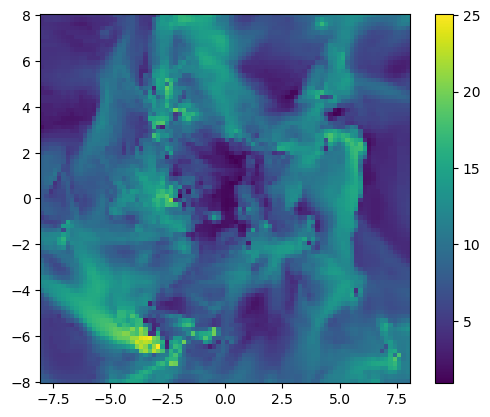

In [75]:
using PyPlot
imshow( ( permutedims(proj_z.maps[:mach]) ), origin="lower", extent=proj_z.cextent)
colorbar();

Remove the column :mach from the table:

In [38]:
gas.data = select(gas.data, Not(:mach)) # select all columns, not :mach

Table with 849332 rows, 11 columns:
Columns:
#   colname  type
────────────────────
1   level    Int64
2   cx       Int64
3   cy       Int64
4   cz       Int64
5   rho      Float64
6   vx       Float64
7   vy       Float64
8   vz       Float64
9   p        Float64
10  var6     Float64
11  var7     Float64

## Masking
Many functions in **MERA** provide the opportunity to use a mask on selected data without changing the content in the data table. Here we present several methods to prepare a mask and apply it to some functions. A created mask is an array of type: *MaskType*, which can be Array{Bool,1} or BitArray{1}. A masked cell/row corresponds to a **false**.

#### Version 1: External Function
Create an array which represents the cells with the selected condition by true.
The function checks if the following requirement is true or false for each row/cell in the data table:

In [6]:
function ftest(value)
    density = (4. / gas.scale.Msol_pc3)
    if value < density
        return true
     else 
        return false
    end
end

mask_v1 = map(row->ftest(row.rho), gas.data);

println( length(mask_v1) )
println( typeof(mask_v1) )

849332
Array{Bool,1}


#### Version 2: Short Syntax

##### Example 1

In [56]:
mask_v2 = map(row->row.rho < 4. / gas.scale.Msol_pc3, gas.data);

println( length(mask_v2) )
println( typeof(mask_v2) )

849332
Array{Bool,1}


##### Example 2

In [5]:
mask_v2b = getvar(gas, :rho, :Msol_pc3) .> 1. ;

println( length(mask_v2b) )
println( typeof(mask_v2b) )

849332
BitArray{1}


#### Version 3: Longer Syntax

In [55]:
rho_array = select(gas.data, :rho);
mask_v3 = rho_array .< 1. / gas.scale.Msol_pc3;

println( length(mask_v3) )
println( typeof(mask_v3) )

849332
BitArray{1}


### Some Functions With Masking Functionality
The masked rows are not considered in the calculations (mask-element = false ).

### Examples

### Total Mass

In [58]:
mask = map(row->row.rho < 1. / gas.scale.Msol_pc3, gas.data);
mtot_masked = msum(gas, :Msol, mask=mask) 
mtot        = msum(gas, :Msol) 
println()
println( "Gas Mtot masked: ", mtot_masked  , " Msol" )
println( "Gas Mtot:        ", mtot         , " Msol" )
println()


Gas Mtot masked: 1.336918953133308e10 Msol
Gas Mtot:        3.0968754148332745e10 Msol



In [61]:
mask = map(row->row.birth < 100. / particles.scale.Myr, particles.data);
mtot_masked = msum(particles, :Msol, mask=mask) 
mtot        = msum(particles, :Msol) 
println()
println( "Particles Mtot masked: ", mtot_masked , " Msol" )
println( "Particles Mtot:        ", mtot        , " Msol" )
println()


Particles Mtot masked: 1.4537556611888414e7 Msol
Particles Mtot:        5.804426008528437e9 Msol



In [62]:
mask = map(row->row.mass_cl < 1e6 / clumps.scale.Msol, clumps.data);
mtot_masked = msum(clumps, :Msol, mask=mask) 
mtot        = msum(clumps, :Msol) 
println()
println( "Clumps Mtot masked:    ", mtot_masked , " Msol" )
println( "Clumps Mtot:           ", mtot        , " Msol" )
println()


Clumps Mtot masked:    2.926390055686605e7 Msol
Clumps Mtot:           1.3743280681841677e10 Msol



### Center-Of-Mass

In [63]:
mask = map(row->row.rho < 100. / gas.scale.nH, gas.data);
com_gas_masked = center_of_mass(gas, :kpc, mask=mask) 
com_gas        = center_of_mass(gas, :kpc) 
println()
println( "Gas COM masked: ", com_gas_masked , " kpc" )
println( "Gas COM:        ", com_gas        , " kpc" )
println()


Gas COM masked: (23.632781376611646, 24.017935187730938, 24.078280687627124) kpc
Gas COM:        (23.47221401632259, 23.93931869865653, 24.08483637116779) kpc



In [65]:
mask = map(row->row.birth < 100. / particles.scale.Myr, particles.data);
com_particles_masked = center_of_mass(particles, :kpc, mask=mask) 
com_particles        = center_of_mass(particles, :kpc) 
println()
println( "Particles COM masked: ", com_particles_masked , " kpc" )
println( "Particles COM:        ", com_particles        , " kpc" )
println()


Particles COM masked: (22.766374936557934, 24.817294529838456, 24.020065595650212) kpc
Particles COM:        (22.891354761211332, 24.174147282680273, 24.003205056545575) kpc



In [66]:
# calculate joint center-of-mass from gas and particles
mask1 = map(row->row.rho < 100. / gas.scale.nH, gas.data); # mask for the hydro data
mask2 = map(row->row.birth < 100.  / particles.scale.Myr, particles.data); # mask for the particle data

println( "Joint COM (Gas + Particles) masked: ", center_of_mass([gas,particles], :kpc, mask=[mask1, mask2]) , " kpc" )
println( "Joint COM (Gas + Particles):        ", center_of_mass([gas,particles], :kpc) , " kpc" )

Joint COM (Gas + Particles) masked: (23.632014753139174, 24.01864248583754, 24.078229177095928) kpc
Joint COM (Gas + Particles):        (23.380528865533876, 23.976384982693947, 24.07195135758772) kpc


In [67]:
mask = map(row->row.mass_cl < 1e6 / clumps.scale.Msol, clumps.data);
com_clumps_masked = center_of_mass(clumps, mask=mask) 
com_clumps        = center_of_mass(clumps) 
println()
println( "Clumps COM masked:", com_clumps_masked .* clumps.scale.kpc, " kpc" )
println( "Clumps COM:       ", com_clumps        .* clumps.scale.kpc, " kpc" )
println()


Clumps COM masked:(22.979676622296815, 23.22447986984898, 24.11056806473746) kpc
Clumps COM:       (23.135765457064576, 23.741712325649264, 24.0050127185862) kpc



### Bulk-Velocity

In [68]:
mask = map(row->row.rho < 100. / gas.scale.nH, gas.data);
bv_gas_masked = bulk_velocity(gas, :km_s, mask=mask) 
bv_gas        = bulk_velocity(gas, :km_s)  
println()
println( "Gas bulk velocity masked: ", bv_gas_masked , " km/s" )
println( "Gas bulk velocity:        ", bv_gas        , " km/s" )
println()


Gas bulk velocity masked: (-0.046336703401138456, -6.60993479840688, -1.000280146674773) km/s
Gas bulk velocity:        (-1.1999253584798182, -10.678485153330122, -0.44038538452508785) km/s



In [69]:
mask = map(row->row.birth < 100. / particles.scale.Myr, particles.data);
bv_particles_masked = bulk_velocity(particles, :km_s, mask=mask) 
bv_particles        = bulk_velocity(particles, :km_s) 
println()
println( "Particles bulk velocity masked: ", bv_particles_masked , " km/s" )
println( "Particles bulk velocity:        ", bv_particles        , " km/s" )
println()


Particles bulk velocity masked: (-27.702254113836513, -7.532075727552787, -1.3273993940211153) km/s
Particles bulk velocity:        (-11.623422700314535, -18.440572802490234, -0.3291927731417528) km/s



### Weighted Statistics

(It is also possible to use the mask within the *getvar* function)

In [72]:
maskgas   = map(row->row.rho < 100. / gas.scale.nH, gas.data);
maskpart  = map(row->row.birth < 100.  / particles.scale.Myr, particles.data);
maskclump = map(row->row.mass_cl < 1e7 / clumps.scale.Msol, clumps.data);

stats_gas_masked       = wstat( getvar(gas,       :vx,     :km_s), weight=getvar(gas,       :mass  ),  mask=maskgas);
stats_particles_masked = wstat( getvar(particles, :vx,     :km_s), weight=getvar(particles, :mass   ), mask=maskpart);
stats_clumps_masked    = wstat( getvar(clumps,    :peak_x, :kpc ), weight=getvar(clumps,    :mass_cl), mask=maskclump)  ;

println( "Gas        <vx>_cells masked      : ",  stats_gas_masked.mean,       " km/s (mass weighted)" )
println( "Particles  <vx>_particles masked  : ",  stats_particles_masked.mean, " km/s (mass weighted)" )
println( "Clumps <peak_x>_clumps masked     : ",  stats_clumps_masked.mean,    " kpc  (mass weighted)" )
println()

Gas        <vx>_cells masked      : -0.04633670340114798 km/s (mass weighted)
Particles  <vx>_particles masked  : -27.702254113836517 km/s (mass weighted)
Clumps <peak_x>_clumps masked     : 22.907689025275953 kpc  (mass weighted)



In [73]:
stats_gas       = wstat( getvar(gas,       :vx,     :km_s), weight=getvar(gas,       :mass  ));
stats_particles = wstat( getvar(particles, :vx,     :km_s), weight=getvar(particles, :mass   ));
stats_clumps    = wstat( getvar(clumps,    :peak_x, :kpc ), weight=getvar(clumps,    :mass_cl))  ;

println( "Gas        <vx>_allcells     : ",  stats_gas.mean,       " km/s (mass weighted)" )
println( "Particles  <vx>_allparticles : ",  stats_particles.mean, " km/s (mass weighted)" )
println( "Clumps <peak_x>_allclumps    : ",  stats_clumps.mean,    " kpc  (mass weighted)" )
println()

Gas        <vx>_allcells     : -1.199925358479736 km/s (mass weighted)
Particles  <vx>_allparticles : -11.623422700314544 km/s (mass weighted)
Clumps <peak_x>_allclumps    : 23.13576545706458 kpc  (mass weighted)

